This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will:

- Solve lecture examples
- Solve lecture exercises

# 0. Load libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, uniform , binom

# 1. Lecture examples

### Example 1

<div class="alert alert-block alert-info">
Represent the sampling distribution of both estimators. To do so, consider:

* The population follows a Normal distribution with $\mu = 2$ and $\sigma^2 = 2$
* Use $n=10$
</div>

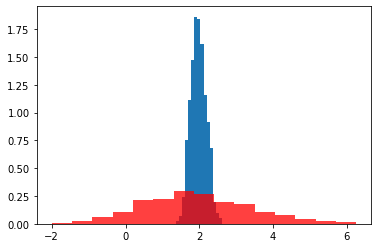

Estimator 1
Mean of the mean: 1.9807636214901039
std of the mean: 0.20530337592692777

Estimator 2
Mean of the mean: 1.9305694451692321
std of the mean: 1.4392398480184958


In [2]:
N = 500
n = 50

mean_1 = []
mean_2 = []
for i in range(N):
    sample_i = norm(loc = 2, scale = np.sqrt(2)).rvs(size = n)
    mean_1.append(sample_i.mean())
    mean_2.append(sample_i[0])

plt.hist(mean_1, density = True, bins = 15)
plt.hist(mean_2, density = True, bins = 15, color = 'red', alpha = 0.75)
plt.show()

print('Estimator 1')
print('Mean of the mean:', np.mean(mean_1))
print('std of the mean:', np.std(mean_1))


print('\nEstimator 2')
print('Mean of the mean:', np.mean(mean_2))
print('std of the mean:', np.std(mean_2))

### Example 2

<div class="alert alert-block alert-info">
Let $X$ be a r.v. that follows a $\mathcal{N}(\mu,\sigma)$ with $\mu=100$ and $\sigma=15$. What's the sampling distribution of $\bar{X}$ for different values of $n$? Check your analytical solution with computer simulations. 
</div>

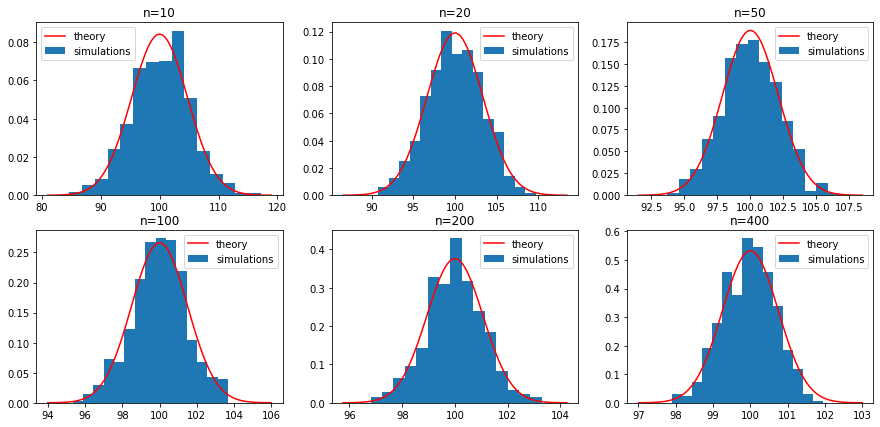

In [3]:
N = 500
n_values = [10,20,50,100,200,400]

# population values
mu = 100
sigma = 15

plt.figure(figsize = (15,7))
for k,n in enumerate(n_values):
    
    # simulations
    mean = []
    for i in range(N):
        sample_i = norm(loc = mu, scale = sigma).rvs(size = n)
        mean.append(sample_i.mean())

    # sampling distribution
    sigma_mean = sigma/np.sqrt(n)
    x = np.linspace(mu-4*sigma_mean,mu+4*sigma_mean,100)    
    pdf = norm(loc = mu, scale = sigma_mean).pdf(x)    
    
    # do the plotting
    plt.subplot(2,3,k+1)
    plt.hist(mean, density = True, bins = 15, label = 'simulations')
    plt.plot(x,pdf,'r', label = 'theory')
    plt.title('n=' + str(n))
    plt.legend()

plt.show()

### Example 3: your turn

<div class="alert alert-block alert-info">
Let $X$ be a r.v. that follows a uniform $\mathcal{U}(a,b)$ with $a=150$ and $b=190$. What's the sampling distribution of $\bar{X}$ for different values of $n$? Check your analytical solution with computer simulations.  
</div>

You might want to read the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) about the uniform distribution first.

Remember to **copy + paste** if needed.

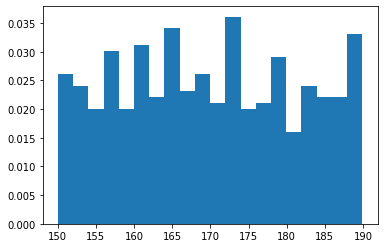

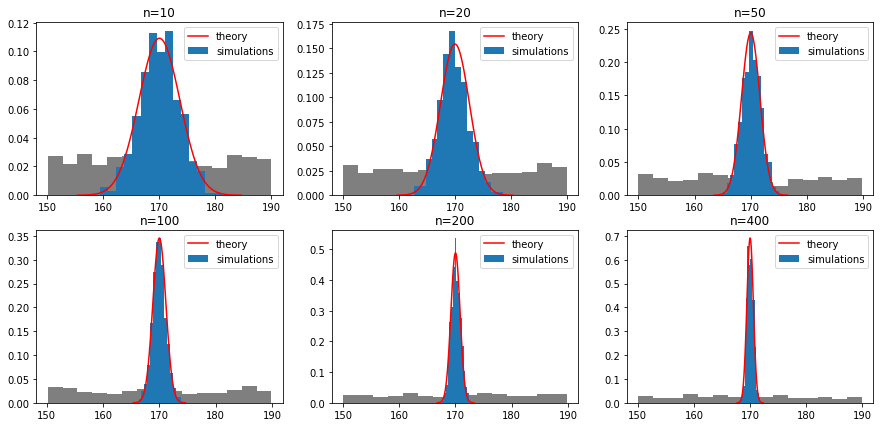

In [3]:
N = 500
n_values = [10,20,50,100,200,400]

# population values
a = 150
b = 190
mu = (a+b)/2
sigma = (b-a)/np.sqrt(12)

# just an example of uniform distribution
plt.hist(uniform(loc = a, scale = b-a).rvs(size = 500), bins=20, density = True)
plt.show()

# YOUR CODE DOWN HERE
# ...

plt.figure(figsize = (15,7))
for k,n in enumerate(n_values):
    
    # simulations
    mean = []
    for i in range(N):
        sample_i = uniform(loc = a, scale = b-a).rvs(size = n)
        mean.append(sample_i.mean())

    # sampling distribution
    sigma_mean = sigma/np.sqrt(n)
    x = np.linspace(mu-4*sigma_mean,mu+4*sigma_mean,100)    
    pdf = norm(loc = mu, scale = sigma_mean).pdf(x)    
    
    # do the plotting
    plt.subplot(2,3,k+1)
    plt.hist(uniform(loc = a, scale = b-a).rvs(size = 500), bins=15, color = 'black', alpha = 0.5, density = True)
    plt.hist(mean, density = True, bins = 15, label = 'simulations')
    plt.plot(x,pdf,'r', label = 'theory')
    plt.title('n=' + str(n))
    plt.legend()

plt.show()

# 2. Lecture exercise

### Exercise 1: standard normal vs t-student

Take a look to the documentation of the [t-student](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html) distribution.

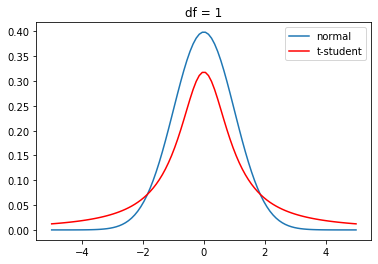

In [7]:
from scipy.stats import t

# x-axis range
x = np.linspace(-5,5,100)

# Standard normal pdf
standard_normal_pdf = norm().pdf(x)

# t-student with df degrees of freedom
df = 1
t_student_pdf =  t(df).pdf(x)

# do the plotting
plt.plot(x,standard_normal_pdf,label='normal')
plt.plot(x,t_student_pdf,'r',label='t-student')
plt.title('df = ' + str(df))
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
Change the value of $\verb"df"$ and take a look to the figure. For each $\verb"df"$ value, calculate the $95\%$ percentile for each distribution (see lecture slides).  
</div>

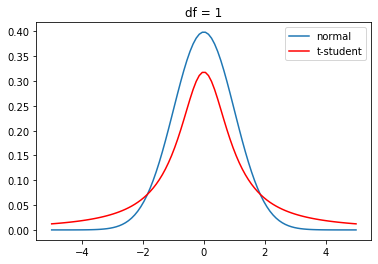

6.313751514800932
1.6448536269514722


In [7]:
df2 = 2 
df5 = 5
df100 = 100
t_student_pdf =  t(df).pdf(x)
t_student_pdf2 =  t(df2).pdf(x)
t_student_pdf5 =  t(df5).pdf(x)
t_student_pdf100 =  t(df100).pdf(x)
plt.plot(x,standard_normal_pdf,label='normal')
plt.plot(x,t_student_pdf,'r',label='t-student')
plt.title('df = ' + str(df))
plt.legend()
plt.show()

print(t.ppf(0.95, df))
print(norm.ppf(0.95))

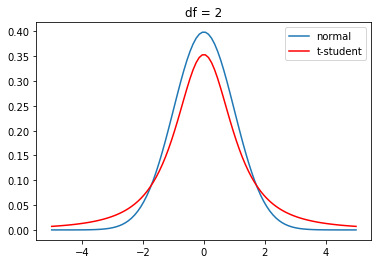

2.919985580355516
1.6448536269514722


In [8]:
plt.plot(x,standard_normal_pdf,label='normal')
plt.plot(x,t_student_pdf2,'r',label='t-student')
plt.title('df = ' + str(df2))
plt.legend()
plt.show()
print(t.ppf(0.95, df2))
print(norm.ppf(0.95))

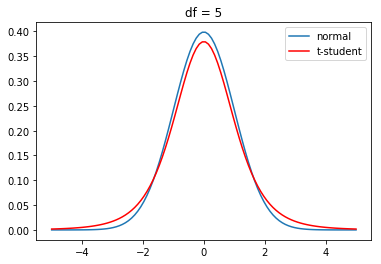

2.015048372669157
1.6448536269514722


In [18]:
plt.plot(x,standard_normal_pdf,label='normal')
plt.plot(x,t_student_pdf5,'r',label='t-student')
plt.title('df = ' + str(df5))
plt.legend()
plt.show()
print(t.ppf(0.95, df5))
print(norm.ppf(0.95))

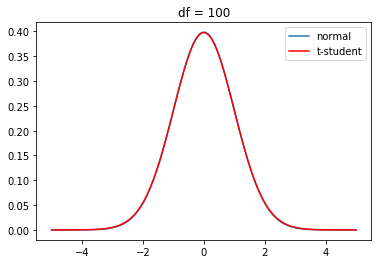

1.66023432606575
1.6448536269514722


In [19]:
plt.plot(x,standard_normal_pdf,label='normal')
plt.plot(x,t_student_pdf100,'r',label='t-student')
plt.title('df = ' + str(df100))
plt.legend()
plt.show()
print(t.ppf(0.95, df100))
print(norm.ppf(0.95))

<div class="alert alert-block alert-info">
How many degrees of freedom do we need to approximate the percentiles of a t-distribution to the normal distribution? How does it affect to the confidence interval estimation of the mean?
</div>

$$\overline{x} \pm t_{n-1,1-\alpha/2} \cdot\frac{s_*}{\sqrt{n}}$$

a) Further values of infinity will aprox to standard normal distribution
b) 

### Exercise 2: confidence intervals for small samples

<div class="alert alert-block alert-info">
Calculate the $95\%$ confidence interval for the variable $\verb"mpg"$ contained in the dataset $\verb"mtcars.csv"$.  
</div>

In [4]:
mtcars = pd.read_csv('C:\\Users\\riul0\\Desktop\\Inference\\inference_prof\\inference\\data\mtcars.csv',sep=",",decimal='.')
mtcars.head()

,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
from scipy.stats import sem # you do not need this, but could be used

mpg = mtcars.mpg.values

n = len(mpg) # number of elements
mean = mpg.mean() # sample mean
se = np.std(mpg,ddof=1)/np.sqrt(n) # standard error or doing sem(mpg)

tn_alpha = t(df = n-1).ppf(0.975)

print(mean + tn_alpha*se)
print(mean - tn_alpha*se)

22.263571491253757
17.91767850874625


In [9]:
t(df=n-1,loc= mean,scale = se).interval(0.95)

(17.91767850874625, 22.263571491253757)

### Exercise 3: confidence intervals

We are analyzing how to extract insights from a sample of the population. Let's consider the population be the size of every house in Ames, Iowa (we will use the `AmesHousing.csv` dataset):

In [15]:
# load data
ames_df = pd.read_csv('C:\\Users\\riul0\\Desktop\\Inference\\inference_prof\\inference\\data\AmesHousing.csv',sep=',',decimal='.')
print('size:', ames_df.shape)

# Population and sample
population = ames_df['Gr Liv Area']
sample = population.sample(60)

size: (2930, 82)


<div class="alert alert-block alert-info">
Calculate the mean and standard deviation of the population. Plot its distribution (you can use a histogram).  
</div>

In [16]:
population.describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr Liv Area, dtype: float64

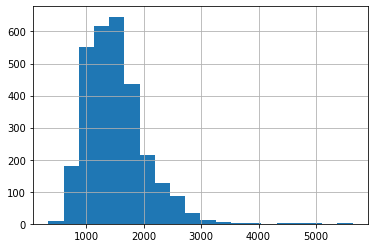

In [17]:
population.hist(bins=20)

In [18]:
n = population.count()
mean = population.mean()
se = np.std(population,ddof=1)/np.sqrt(n)

<div class="alert alert-block alert-info">
Calculate the $95\%$ confidence interval of the population mean using the sample information. What if instead of using $t_{n-1,1-\alpha/2}$ you use $z_{1-\alpha/2}$? Are there any differences on the results?
</div>

a)

In [19]:
pop_alpha = t(df = n-1).ppf(0.975) #975 cause is 1- alpha/2


In [20]:
print(mean + pop_alpha*se)
print(mean - pop_alpha*se)

1518.0018870336999
1481.3790003383137


In [21]:
t(df=n-1,loc= mean,scale = se).interval(0.95)

(1481.3790003383137, 1518.0018870336999)

b)

In [67]:
norm(loc= mean,scale = se).interval(0.95)

(1481.3865672103348, 1517.9943201616788)

### Exercise 4: confidence interval meaning

Using the population data from the previous exercise, let's analyze now the meaning of a confidence interval. For doing this we will repeat $N=1000$ times the following steps:

- Take a sample of size $n=60$ from the population
- Calculate the $95\%$ confidence interval (CI)
- If the population mean lies in the CI, increase the counter variable `counts`

By the end of the experiment approximately $95\%$ of N times will lie within the calculated CIs.

Hint: you might want to use the following function

In [62]:
def t_conficence_interval(x, conf_level = 0.95):
    
    n  = len(x)
    mu = np.mean(x)
    se = np.std(x,ddof=1)/np.sqrt(n)
    
    lower, upper = t(df=n-1,loc=mu,scale=se).interval(0.95)
    
    return lower, upper

In [69]:
N = 1000
n = 60

mu = population.mean()
counts = 0

for i in range(N):
    
    # Take a sample from the population
    sample_i = population.sample(n)
    
    # Calculate the lower and upper values of the CI
    lower, upper = t_conficence_interval(sample_i)
    
    # Increase counter value
    if (mu >= lower) & (mu <= upper):
        counts += 1
    

print(counts)

952


### Exercise 5: confidence interval of a Binomial distribution
 
<div class="alert alert-block alert-info">
Your campaign advisor told you that in a random sample of 100 likely voters, 56 intent to vote for you. Can you relax? Use a $95\%$ to answer this question
</div>

$$\hat{p}\pm z_{1-\alpha/2}\sqrt{\frac{\hat{p}\hat{q}}{n}}$$

In [26]:
p = 56/100
n = 100

mean =  p
q = 1 - p
se = np.sqrt(p*q/n)

print(n*p*q)


print(binom(n,p).interval(0.95))

#Second option
p_hat = 56/100
q_hat = 1-p_hat

n = 100
se = np.sqrt(p_hat*q_hat/n)
z = norm.ppf(0.975) #1 - alpha/2

print(p_hat - z*se, p_hat + z*se)

24.64
(46.0, 66.0)
0.4627099463758483 0.6572900536241518


In [3]:
p = 56/100
n = 100

mean =  p
q = 1 - p
se = np.sqrt(p*q/n)

z = norm.ppf(0.975) #1 - alpha/2

print(p - z*se, p + z*se)

0.4627099463758483 0.6572900536241518


# 3. More exercises (optional)

1. Plot a $\chi^2_n$ distribution for different values of $n$
1. Repeat exercises 3 and 4 for estimating the CI of the variance

#### a)

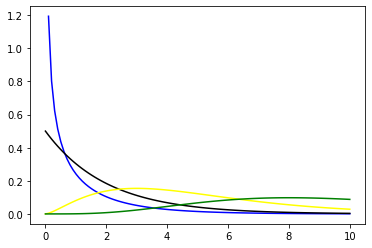

In [26]:
from scipy.stats import chi2
x = np.linspace(0, 10, 100)
color = ['red', 'blue', 'black', 'yellow', 'green']
n = [0,1, 2, 5, 10, 20]
for i,c in zip(n,color):
    plt.plot(x, chi2.pdf(x, i), c)

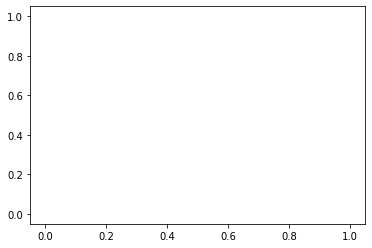

In [28]:
plt.plot(x, chi2.pdf(x, 0), 'red')

#### b)